# United States - Crime Rates - 1960 - 2014

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [ ]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()

### Step 4. What is the type of the columns?

In [ ]:
crime.info()

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [30]:
# pd.to_datetime(crime)
crime['dt_Year'] = pd.to_datetime(crime.Year, format='%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dt_Year               55 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(12)
memory usage: 5.7 KB


### Step 6. Set the Year column as the index of the dataframe

In [50]:
crime1 = crime.copy()

In [51]:
crime1.set_index('Year',inplace=True)
crime1.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Decade
Year,,,,,,,,,,,
1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,196
1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,196
1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,196
1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,196
1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,196


In [31]:
crime.set_index('dt_Year', inplace = True)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
dt_Year,,,,,,,,,,,,
1960-01-01,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 7. Delete the Total column

In [ ]:
del crime['Total']
crime.head()

### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [ ]:
crime['Decade'] = crime.Year//10
crime.head

In [57]:
cols = crime.loc[:,'Population':'Vehicle_Theft']
agg = {c : 'sum' for c in cols}
agg['Population'] = 'last'
gb=crime.groupby('Decade').agg(agg)
gb

,Aggravated_assault,Murder,Larceny_Theft,Vehicle_Theft,Forcible_Rape,Violent,Robbery,Burglary,Property,Population
Decade,,,,,,,,,,
196,2158520,106180,26547700,5292100,236720,4134930,1633510,13321100,45160900,201385000
197,4702120,192230,53157800,9739900,554570,9607930,4159020,28486000,91383800,220099000
198,7619130,206439,72040253,11935411,865639,14074328,5383109,33073494,117048900,248239000
199,10568963,211664,77679366,14624418,998827,17527048,5748930,26750015,119053499,272690813
200,8652124,163068,67970291,11412834,922499,13968056,4230366,21565176,100944369,307006550
201,3764142,72867,30401698,3569080,421059,6072017,1749809,10125170,44095950,318857056


In [ ]:
# To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
# To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

# Uses resample to sum each decade
crimes = crime1.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
population = crime1['Population'].resample('10AS').max()

# Updating the "Population" column
crimes['Population'] = population

crimes

### Step 9. What is the most dangerous decade to live in the US?

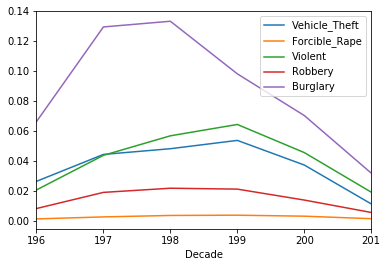

In [62]:
trend=gb.loc[:,'Vehicle_Theft':'Burglary'].div(gb.Population,'rows')
trend.plot()

In [46]:
# apparently the 90s was a pretty dangerous time in the US
crime.idxmax(0)

Year                 2014-01-01
Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
Decade               2010-01-01
dtype: datetime64[ns]